In [4]:
#NLP Libraries:
import nltk

#Our standards:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set("talk")

In [5]:
# Do not limit column width in pandas df
pd.set_option('display.max_colwidth', None)

# Read CSV
data = pd.read_csv('./data/used_cars_100k.csv')
# data = data.sample(frac=1).reset_index(drop=True)

/Users/org/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Text Stats

In [23]:
desc = data[['id','description']]

In [24]:
desc['description'] = desc.description.str.lower()
desc

/var/folders/w5/ss0d86s13hv0lvf5_8nlgbpw0000gn/T/ipykernel_5624/1427868633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc['description'] = desc.description.str.lower()


id  \
0      1386632   
1      2702789   
2      2254389   
3      2974344   
4       687231   
...        ...   
99995  2404937   
99996  2987323   
99997   332865   
99998   511594   
99999  1151006   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [25]:
desc_lengths = desc['description'].str.len()
desc_lengths

0        5769.0
1        4022.0
2        3782.0
3        5183.0
4        3358.0
          ...  
99995     757.0
99996    3546.0
99997     872.0
99998    2590.0
99999    3613.0
Name: description, Length: 100000, dtype: float64

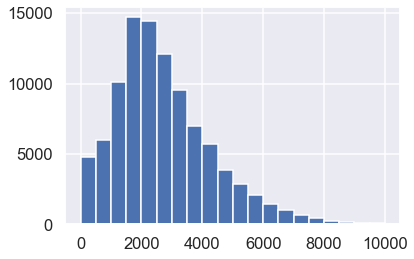

In [26]:
plt.hist(desc_lengths, bins=20, range=(0, 10000))
plt.show()

## Tokenize

In [27]:
from nltk.tokenize import wordpunct_tokenize

In [28]:
desc['split_desc'] = desc.description.apply(lambda x: wordpunct_tokenize(str(x).replace("'","")))

/var/folders/w5/ss0d86s13hv0lvf5_8nlgbpw0000gn/T/ipykernel_5624/2475140295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc['split_desc'] = desc.description.apply(lambda x: wordpunct_tokenize(str(x).replace("'","")))


In [29]:
desc['split_desc'][0]

['**',
 'low',
 'miles',
 ',',
 'dual',
 'zone',
 'automatic',
 'climate',
 'control',
 ',',
 'lx',
 'cool',
 '&',
 'connected',
 'package',
 ',',
 'radio',
 ':',
 'am',
 '/',
 'fm',
 '/',
 'cd',
 '/',
 'mp3',
 '/',
 'siriusxm',
 'w',
 '/',
 'uvo',
 'eservices',
 ',',
 '3',
 '.',
 '51',
 'axle',
 'ratio',
 ',',
 '4',
 '-',
 'wheel',
 'disc',
 'brakes',
 ',',
 '6',
 'speakers',
 ',',
 'abs',
 'brakes',
 ',',
 'air',
 'conditioning',
 ',',
 'am',
 '/',
 'fm',
 'radio',
 ':',
 'siriusxm',
 ',',
 'anti',
 '-',
 'whiplash',
 'front',
 'head',
 'restraints',
 ',',
 'brake',
 'assist',
 ',',
 'bumpers',
 ':',
 'body',
 '-',
 'color',
 ',',
 'carpet',
 'floor',
 'mats',
 '(',
 '5',
 'seat',
 '),',
 'cd',
 'player',
 ',',
 'delay',
 '-',
 'off',
 'headlights',
 ',',
 'driver',
 'door',
 'bin',
 ',',
 'driver',
 'vanity',
 'mirror',
 ',',
 'dual',
 'front',
 'impact',
 'airbags',
 ',',
 'dual',
 'front',
 'side',
 'impact',
 'airbags',
 ',',
 'electronic',
 'stability',
 'control',
 ',',
 'exter

calculating lengths

In [30]:
desc['split_desc_lengths'] = desc['split_desc'].apply(lambda x: len(x))

/var/folders/w5/ss0d86s13hv0lvf5_8nlgbpw0000gn/T/ipykernel_5624/1251121060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc['split_desc_lengths'] = desc['split_desc'].apply(lambda x: len(x))


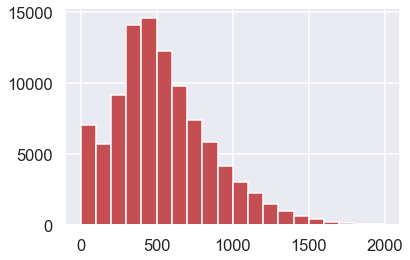

In [31]:
plt.hist(desc['split_desc_lengths'], bins=20, range=(0, 2000), color='r')
plt.show()

description length, frequency

In [32]:
desc['split_desc_lengths'].value_counts()

1       2637
412      178
416      175
310      175
372      174
        ... 
1808       1
1941       1
2035       1
2079       1
1775       1
Name: split_desc_lengths, Length: 2080, dtype: int64

Dropping empty descriptions:

In [33]:
desc.drop(desc[desc.split_desc_lengths == 1].index, inplace=True)

/Users/org/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
desc['split_desc_lengths'].value_counts()

412     178
310     175
416     175
372     174
432     174
       ... 
1808      1
1941      1
2035      1
2079      1
1775      1
Name: split_desc_lengths, Length: 2079, dtype: int64

id, description length (Sorted)

In [35]:
desc['split_desc_lengths'].sort_values()

56091       2
90088       2
5345        2
97714       2
35865       2
         ... 
56249    3557
38889    3794
15448    3966
25383    3973
30413    6092
Name: split_desc_lengths, Length: 97363, dtype: int64

### Stop-Words

In [36]:
from nltk.corpus import stopwords
from string import punctuation

In [37]:
english_sw = stopwords.words('english')
english_sw += punctuation
print(len(english_sw))
english_sw

211


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
desc['split_desc'] = desc.split_desc.apply(lambda x: list(filter(lambda y: y if y not in english_sw else "", x)))

In [79]:
# Creating a word corpus

vocabulary = list()
for l in desc['split_desc'].values:
    vocabulary.extend(l)


In [80]:
len(set(vocabulary))

67627

In [81]:
from collections import Counter
counter=Counter(vocabulary)
most=counter.most_common(10)

In [82]:
most

[('front', 872445),
 ('rear', 821573),
 ('power', 692779),
 ('wheel', 550536),
 ('steering', 478912),
 ('seat', 457464),
 ('control', 445245),
 ('driver', 387654),
 ('door', 372728),
 ('system', 347978)]

### Bigrams and Trigrams

In [91]:
bigrams = list()
trigrams = list()
for sentence in desc['split_desc'].values:
    bigrams += nltk.bigrams(sentence)
    trigrams += nltk.trigrams(sentence)

In [92]:
from collections import Counter

bigrams_counter = Counter(bigrams)
trigrams_counter = Counter(trigrams)

In [93]:
bigrams_counter.most_common(10)

[(('steering', 'wheel'), 323937),
 (('air', 'bag'), 153649),
 (('vanity', 'mirror'), 146495),
 (('power', 'door'), 124641),
 (('rear', 'seat'), 117196),
 (('keyless', 'entry'), 111501),
 (('power', 'windows'), 110351),
 (('traction', 'control'), 105883),
 (('bucket', 'seats'), 100901),
 (('dual', 'front'), 99741)]

In [94]:
trigrams_counter.most_common(10)

[(('additional', 'info', '@@!]'), 92271),
 (('anti', 'roll', 'bar'), 83812),
 (('power', 'door', 'locks'), 78921),
 (('4', 'wheel', 'disc'), 74024),
 (('wheel', 'disc', 'brakes'), 72735),
 (('steering', 'wheel', 'mounted'), 67454),
 (('passenger', 'vanity', 'mirror'), 66788),
 (('remote', 'keyless', 'entry'), 64563),
 (('driver', 'vanity', 'mirror'), 64096),
 (('front', 'bucket', 'seats'), 58466)]